In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython import display as disp
import time
from pathlib import Path
import cython
%load_ext cython
%matplotlib inline

In [2]:
def display(vals, colorbar=False, cont=False):
    """
    Display a matrix computed by main()
    """
    bounds=[0, 1, 2, 3, 4, 5, 6]
    if cont:
        cmap = mpl.cm.rainbow
        norm = mpl.colors.Normalize(vmin=np.min(vals), vmax=np.max(vals))
    else:
        cmap = mpl.colors.ListedColormap(['white', '#40ea5c', '#4076ea', '#7220f4', '#e758a0','#f40000'])
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    fig, ax = plt.subplots(figsize=(8, 8))
    fig.subplots_adjust(bottom=0)
    img = ax.imshow(vals,interpolation='nearest', cmap=cmap, norm=norm)
    if colorbar:
        if cont:
            fig.colorbar(img, cmap=cmap, norm=norm, orientation='horizontal')
        else:
            fig.colorbar(img, cmap=cmap, norm=norm, boundaries=bounds, ticks=[-5,0,5], orientation='horizontal')

#### main() Computes how the "sand" would fall if a 'start_value' amount of sand were placed on a single field.

In [3]:
%%cython
import numpy as np
import time
cimport numpy as np
from cython import wraparound, boundscheck

DTYPE = np.int64
ctypedef np.int64_t DTYPE_t

@boundscheck(False)
@wraparound(False)
def main(int start_value):
    cdef np.ndarray[DTYPE_t, ndim=2] z = np.array([[start_value]], dtype=DTYPE)
    cdef Py_ssize_t shapeZ = z.shape[0]
    cdef np.ndarray[DTYPE_t, ndim=2] X2
    cdef np.ndarray[DTYPE_t, ndim=2] Y2
    cdef np.ndarray[DTYPE_t, ndim=1] X
    cdef np.ndarray[DTYPE_t, ndim=1] Y
    cdef np.ndarray[DTYPE_t, ndim=1] to_change
    while True:
        X2, Y2 = np.unravel_index(np.where(z.ravel()>3),(shapeZ, shapeZ))
        X = X2[0]
        Y = Y2[0]
        if X.size == 0: break
        if X[0] == 0:
            z = np.pad(z, 1, 'constant', constant_values=0)
            X += 1
            Y += 1
            shapeZ += 2
        to_change = z[X, Y]
        np.add.at(z, ([X+1, X-1, X, X], [Y, Y, Y+1, Y-1]), np.floor_divide(to_change, 4))
        z[X, Y] = to_change % 4
    return z

In [4]:
t = main(50)

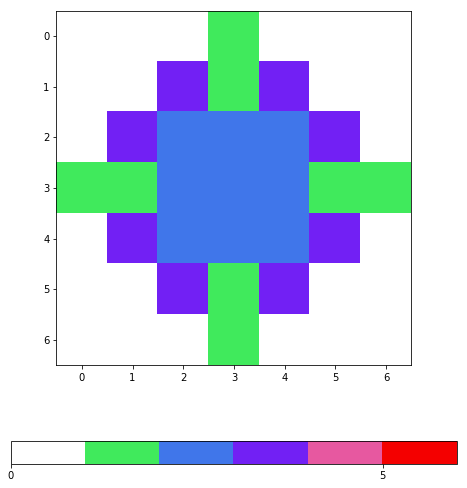

In [5]:
display(t, colorbar=True)

### Compute sandpiles with a single field with "i" amount of sand, iterating from "start_from" up to "stop_at", and saves all images created in the process to disk (under "path").

In [6]:
path = Path('Sandpiles')
path.mkdir(exist_ok=True)

100%
done


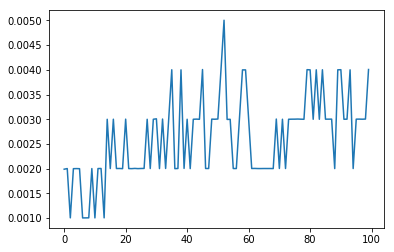

In [7]:
plt.ioff()
cmap = mpl.cm.rainbow
time_history = []
t3 = 0
start_from = 0
stop_at = 100
for i in range(start_from, stop_at):
    t1 = time.time()
    file = path/f'Sandpile_{i}.png'
    print(f'{i}/{stop_at}\n{round(100*(i/stop_at), 2)}%')
    print(f'loop took {round(t3, 4)} seconds')
    if not file.is_file():
        z = main(i)
        plt.imsave(fname=file, arr=z, format='png', cmap = cmap)
        t3 = time.time()-t1
        time_history.append(t3)
    else:
        print(f'{i} already exists')
    disp.clear_output(wait=True)
print('100%\ndone')
plt.plot(time_history)
plt.show()

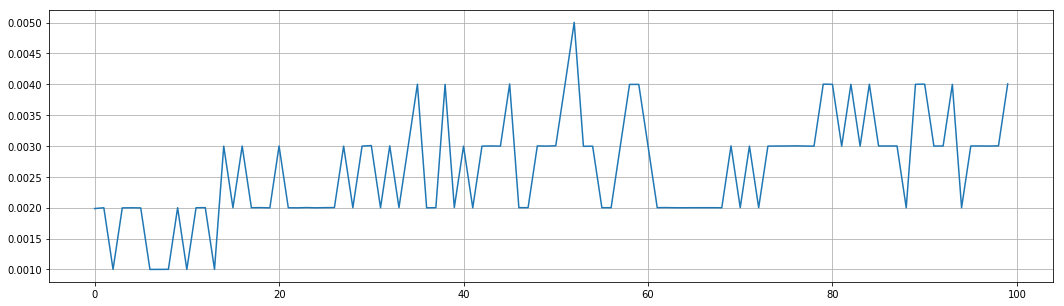

In [8]:
plt.figure(figsize=(18, 5))
plt.plot(time_history)
plt.grid()
plt.show()